# pymdptoolbox Introduction Tutorial

In this notebook, we will show how to take a MDP graph and represent it using pymdptoolbox in python.  Then we will use Value Iteration to find the optimal policy and expected value of the given mdp

## The problem
A forest is managed by two actions: ‘Wait’ and ‘Cut’. An action is decided each year with first the objective to maintain an old forest for wildlife and second to make money selling cut wood Each year. There is a probability p that a fire burns the forest.
As showed in visual representation,blue line is probalibity, transitions.For each year there is 30% chance a fire will burns the forest and bring the state to 0(1 in graph). In comparision, there is 70% change the forest will endure and get into the next state. 
As showed in visual representation,black line is reward. For the first your years, there is no money reward for waiting, plus suffering fire burns.If cut the tree there will be some benefits (reward=1). But once the tree reach the fifth year (state 4), it will start to maintain wildlife (reward =0.3) and have doubled money reward (reward =1)once cut.
### Visual Representation 
![alt text](./cut_wait.png "Visual Representation")

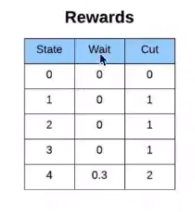

## Step 1
The first thing we need to do is setup matricies for the transition probablities and the rewards.  

The transition probablities will be represented in a num actions x num states x num states matrix

The rewards will be represented in a num states x num actions array

The first index of the probability matrix gives the action taken.
For example, the first prob[0] gives the probability of the action wait.
The rows and columns give the probabilities of transitioning from one state to the next.  
For example, the first row, gives the probabilities of transition of the first state to all other states.  
There is a 0.3 probability that the state will transistion back onto itself or burn.  There is a 0.7 chance of transitioning onto the next state (or surviving a year).  There is a 0 chance that it will transition into any other state.

The last state we see that there is a .7 chance that the forest will stay at the same state and a .3 chance that it will transistion back into the first state or burn down.

The second index of the probability matrix (prob[1]) gives the probabilities of cutting down the forest.  There is a 100% chance of transistioning back to the first state for each state or year that the forest is growing.

The reward matrix gives the expected reward for each for each action from each state.

Thus, the index of the reward indicates the year.
The first index of the value indicates the reward for the first action (waiting).  The second index of the value indicates the reward for the second action (cutting down the tree).
For example, the first reward[0] indicates the rewards for the first state or the first year.  We see that there is 0 reward for waiting and 0 reward for cutting down the tree.  No very exciting.  In year 5 or reward[4] we see that we get a .3 reward for waiting (due to wildlife), and a 2 reward for cutting down the tree.

In [4]:
import numpy as np

prob = np.zeros((2, 5, 5)) #creat 2 empty 5 X 5 array

# probabilities of waiting and risk burning down the forest
prob[0] = [[0.3, 0.7, 0., 0., 0.],
           [0.3, 0.0, 0.7, 0., 0.],
           [0.3, 0.0, 0., 0.7, 0.],
           [0.3, 0.0, 0., 0., 0.7],
           [0.3, 0.0, 0., 0., 0.7]]

# probabilities of cutting down the forest
prob[1] = [[1., 0., 0., 0., 0.],
           [1., 0., 0., 0., 0.],
           [1., 0., 0., 0., 0.],
           [1., 0., 0., 0., 0.],
           [1., 0., 0., 0., 0.]]

# rewards (indecies indicate which year it is)
# the first index in the value is the reward from the wildlife
# the second index is the rewasrd from cutting trees
rewards = np.zeros((5, 2))
rewards[0] = [0., 0.]
rewards[1] = [0., 1.]
rewards[2] = [0., 1.]
rewards[3] = [0., 1.]
rewards[4] = [0.3, 2.]

## Step 2
Now we need to setup the MDP in pymdptoolbox and run Value Iteration to get the expected value and optimal policy.

Value iteration is the process of repeating these transitions, maximizing the reward from each action until a set optimal policy and expected reward is reached.  Since the discount factor is < 1, we are garunteed convergance.

The class value iteration takes in as arguments the probability matrix of each action and the transistion to each state. The reward matrix of the reward at each state.   The third argument is the discount factor.

In [13]:
import mdptoolbox
vi = mdptoolbox.mdp.ValueIteration(transitions=prob, reward=rewards, discount=0.9, epsilon=0.01, max_iter=1000)
vi.setVerbose()
vi.run()

  Iteration		V-variation
    1		  2.0
    2		  0.63
    3		  0.39690000000000014
    4		  0.25004700000000013
    5		  0.1575296100000001
    6		  0.09924365430000015
    7		  0.06252350220900027
    8		  0.03938980639167022
    9		  0.02481557802675205
    10		  0.01563381415685372
    11		  0.00984930291881847
    12		  0.006205060838856635
    13		  0.003909188328480084
    14		  0.002462788646942382
    15		  0.0015515568475739094
    16		  0.000977480813971976
Iterating stopped, epsilon-optimal policy found.


Then we can extract the optimal policy and expected value of each state

In [23]:
optimal_policy = vi.policy
expected_values = vi.V

print ("Optimal policy: %s" %(str(optimal_policy)))
print ("Expected Values: %s" %(str(expected_values)))

Optimal policy: (0, 1, 1, 0, 1)
Expected Values: (3.1021779262212235, 3.7152970594035533, 3.7152970594035533, 3.732177926221223, 4.715297059403554)


### Results

The optimal policy gives what is the optimal action given the current state.  For example, the first state gives the optimal action at that state which is to take action 0 or wait.  The optimal action at the next state is 1 or to cut down the tree.

Expected values gives the value at each state.  